# Support-Vector-Machines = Maximum Margin Classification
good python code [examples](https://www.inovex.de/de/blog/support-vector-machines-guide/)

In [1]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt

Text(-1, -0.5, 'w')

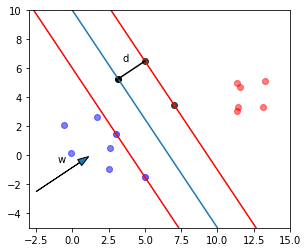

In [2]:
# seperating line
b = 10
w1 = -1.5
w2 = -1
# as vector and the normal to the separating line
w = np.array([w1, w2])
w_norm = w/np.sqrt(np.dot(w, w))
this_is_the_lenth = np.dot(w_norm, w_norm)
# class 1
cl1 = np.array([np.random.normal(loc=1, scale=1.1, size=5), 
          np.random.normal(loc=0, scale = 1.2, size = 5)]).T
# support vectors class 1:
cl1_s = np.array([np.array([5, 7]), (b+4) + w1 * np.array([5, 7])]).T


# class 2
cl2 = np.array([np.random.normal(loc=11.5, scale=2., size=7),
                np.random.normal(loc=4, scale=0.6, size=7)]).T 
# support vectors class 2:
cl2_s = np.array([np.array([3, 5]), (b-4) + w1 * np.array([3, 5])]).T

fig = plt.figure() 
ax = plt.axes()
plt.xlim(-3, 15)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
x = np.linspace(-5, 15, 100)
y = b + w1 * x
ax.plot(x, b + w1 * x)
ax.plot(x, (b-4) + w1 * x, color='red')
ax.plot(x, (b+4) + w1 * x, color='red')
ax.scatter(cl1[:, 0], cl1[:, 1], color='blue', alpha=0.5)
ax.scatter(cl2[:, 0], cl2[:, 1], color='red', alpha=0.5)
ax.scatter(cl1_s[:, 0], cl1_s[:, 1], color='black', alpha=0.7)
ax.scatter(cl2_s[:, 0], cl2_s[:, 1], color='blue', alpha=0.6)
#ax.scatter(7, b + w[0] * 7, color='black')
ax.scatter(41/13, b + w1 *(41/13), color = 'black')
ax.plot([41/13, cl1_s[0,0]],[b + w1 * (41/13), cl1_s[0,1]], color='black')
plt.annotate(text='d',xy=(45/13, 6.5))

plt.arrow(-2.5, -2.5, w[0] * -2, w[1] * -2, head_width=0.5)
plt.annotate(text='w', xy=(-1,-0.5))
# plt.scatter(x, y, color='red', alpha = 0.45)
# print(f'{b + w1 * x + w2 * y}')

Im 2-dimensionalen Raum haben wir die Variablen x, y. Alle Punkte auf einer Geraden (separating plane) bekommt man: 
\begin{equation*} 
a + b\cdot x = c\cdot y 
\end{equation*}<br>
Trivialerweise ist $c=1$ meist gültig. Dies entspricht exakt unserer Geraden-Gleichung aus der Linearen Regression.<br>
Umgekehrt kann man die Gerade auch als die Menge aller Punkte definieren, die folgender Bedingung genügen:<br>
\begin{equation*} 
a + b\cdot x + c\cdot y = 0
\end{equation*} <br>
Im trivialen Fall wäre $c=-1$

Für alle Punkte unterhalb der Gerade gilt:
\begin{equation*} 
a + b\cdot x + c\cdot y < 0
\end{equation*}
und für alle Punkte oberhalb der Geraden gilt:
\begin{equation*} 
a + b\cdot x + c\cdot y > 0
\end{equation*}

Für die Klassifikation gilt, dass die Klassen immer mit $-1$ und $1$ benannt werden. Ein neuer Punkt $(x, y)$ wird klassifiziert:
\begin{equation*}
\hat{\text{pred}} = \text{sign}(a + b\cdot x + c\cdot y)
\end{equation*}

### Aenderung der Schreibweise:
In der Literatur zu Support Vector Machines werden die Koeffizienten anders benannt als in der klassischen Linearen Regression. Anstatt $a$ für den intercept wird $b$ verwendet. Anstatt $b$ für den Steigungskoeffizienten wird $\omega$ verwendet:
\begin{equation*}
\hat{\text{pred}} = \text{sign}(b + \omega_1\cdot x_i + \omega_2\cdot x_2)
\end{equation*}
und in Vektorschreibweise (exakt identisch zur Multivariaten Linearen Regression - mit Ausnahme der Bennenung der Koeffizienten):
\begin{equation*}
\hat{\text{pred}} = \text{sign}(b + \pmb{\omega} \pmb{x})
\end{equation*}

Es kann gezeigt werden, dass der Vektor  $\pmb{\omega}$  senkrecht auf die Trennungs-Ebene (in der Graphik oben die mittlere Gerade) steht. Dies habe ich als Pfeil eingezeichnet.

Nun soll eine Ebene gefunden werden, deren __margin maximal__ ist; als margin wird der Abstand zu den nähesten Daten-Punkten bezeichnet. Die Datenpunkte, die auf den margins zu liegen kommen heissen __support vectors__. Die Enfernung dieser Punkte von der Trennlinie kann angegeben werden:

\begin{equation*}
d= y_i(\pmb{\omega}\pmb{x}_i + b);\quad \quad y_i \in \{-1, 1\},
\end{equation*}

hier ändert $y_i$ das Vorzeichen so, dass die Distanz immer positiv ist.<br>
[siehe zum Beispiel hier](https://www.lernhelfer.de/schuelerlexikon/mathematik-abitur/artikel/normalenvektoren-einer-geraden-der-ebene#)

Für alle Punkte $\mathbf{x_i}$, die genau die Distanz 1 haben gilt:

\begin{eqnarray*}
1 =& y_i(\pmb{\omega}\pmb{x}_i + b)\\
\frac{1}{\left\Vert \pmb{\omega}\right\Vert} =& \left|\frac{\pmb{\omega}\pmb{x}_i}{\left\Vert\pmb{\omega}\right\Vert} + \frac{b}{\left\Vert\pmb{\omega}\right\Vert}\right|
\end{eqnarray*}

$\|\pmb{\omega}\|$ ist die Länge des Vektors $\pmb{\omega}$, die sogenannte Vecktor-Norm. Teile ich einen Vektor durch seine Vektor-Norm, dann hat er genau die Länge $1$. Weil alle Punkte auf dem margin dieselbe Distanz zur Trennlinie haben und weil der margin symmetrisch ist muss

\begin{equation*}
p = \frac{2}{\|\pmb{\omega}\|} 
\end{equation*}
maximiert werden, um den margin möglichst gross zu machen. Das bedeutet, dass $\|\pmb{\omega}\|$ möglichst klein sein muss. <br> 
Der Abstand der beide support-vectors ist also indirekt proportional zur Länge des Vectors $\omega$. Als Minimierungs-Problem ergibt sich:
\begin{equation*}
(\omega^*, b^*) = \text{argmin} \frac{1}{2}\|\pmb{\omega}\| 
\end{equation*}

Maximieren von $\frac{2}{\|\pmb{\omega}\|}$ ist gleichbedeutend mit Minimieren von $\frac{\|\pmb{\omega}\|}{2}$.
Damit haben wir die Formulierung unseres maximum-margin classifiers:<br>
Finde $\pmb{\omega}$ und $b$ so, dass:
 1. $\frac{1}{2}\pmb{\omega}^{T}\pmb{\omega}$ minimiert wird, für alle
 2. $(\mathbf{x}_i, y_i), y_i(\pmb{\omega}\pmb{x}_i + b) \geq 1$

Weil die Vektor-Norm sich als die Quadratwurzel der aufsummierten quadrierten Vectorelemente berechnet:<br>
\begin{equation*}
\|\pmb{\omega}\| = \sqrt{\omega_1^2 + \omega_2^2 + \ldots \omega_d^2}
\end{equation*}
kann man auch schreiben:
\begin{equation*}
\|\pmb{\omega}\| = \sqrt{\pmb{\omega}^{T}\pmb{\omega}}
\end{equation*}
Da die Quadratwurzel eine monotone Transformation ist, kann sie in unserem Minimierungs-Problem einfach weggelassen werden. Somit ergibt sich obige 1. Bedinung.

Will man das lösen, ergibt sich ein quadratische Optimierungsproblem, welches mit Lagrange Multiplikatoren gelöst werden kann.

Hierbei ergibt sich die characteristische Gleichung (dual form) zu:
  \begin{equation*} \text{max}_{\alpha}\sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i y_j \mathbf{x}_i^{T} \cdot \mathbf{x}_j \end{equation*}

Für das Verständnis der nachfolgenden Erklärungen zu kernels, ist der Ausdruck $\mathbf{x}_i^{T} \cdot \mathbf{x}_j$ entscheidend. Hierbei wird das Skalarprodukt (dot product) eines jeden Daten-Punktes $\pmb{x}_i$ mit jedem anderen Daten-Punkt $\pmb{x}_j$ berechnet. Für normierte Vektoren $\mathbf{x}_i$ ist das Skalarprodukt ein Ähnlichkeitsmass (cosine-similarity, correlation-coefficient).<br>

### Problem:
Der Ausdruck 

\begin{equation*}
\mathbf{x}_i^{T} \cdot \mathbf{x}_j
\end{equation*}

in obiger Gleichung zeigt, dass Support-Vecktor-Machines quadratisch mit der Anzahl der Trainings-Punkte skalieren. Es müssen die dot-products aller möglichen Kombinationen von Beobachtungen (data samples) berechnet werden. Für $N=10$ ergeben sich $(10\cdot 9)/2 = 45$ einzigartige Kombinationen. Für $N=20$ sind es $190$. Wir sehen: Eine Verdoppelung der Beobachtungen führt zu mehr als einer Vervierfachung der nötigen Multiplikationen. Wenn die Multiplikationen als Matrizen dargestellt werden wächst der Speicherbedarf noch schneller, da auch alle symmetrischen Kombinationen gespeichert werden.<br>
    SVMs sind also für BigData nicht zu gebrauchen.

## Kernel-Trick

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, '2nd dimension')

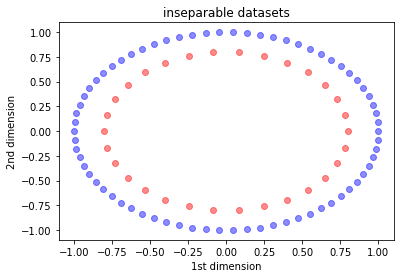

In [5]:
x, y = make_circles(n_samples = (70, 30), random_state=42, factor=0.8)

plt.figure(figsize = (6,4))
plt.scatter(x[y==1, 0], x[y==1, 1], color='red', alpha = 0.45)
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue', alpha = 0.45)
plt.title('inseparable datasets')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension')

In the above Figure, the two data-sets (red dots and blue dots) are not linearily separable. There is no plane/line that can separate the two classes.
### project the data into 3 dimensions
<br>
<br>




\begin{equation*}
\Phi(\mathbf{x})\rightarrow \mathbf{x}_1^{2}, \mathbf{x}_2^{2},\sqrt{2}\mathbf{x}_1\mathbf{x}_2\text{,} 
\end{equation*}
i.e. there is a transformation that projects the x- and y-coordinates to new x- and y-coordinates and to an additional z-coordinate.

In [6]:
# this is the projection into the 3rd coordinate (z-coordinate)
x3 = np.sqrt(2) * x[:, 0] * x[:, 1]
x3 = x3.reshape((-1, 1))
# in the first column of x we have the x-coordinates, in the second column the y-coordinate
mapped_x = np.concatenate((x ** 2, x3), axis=1)
# mapped_x has three coordinates right now:
mapped_x.shape

(100, 3)

Text(0.5, 0, '3rd dimension')

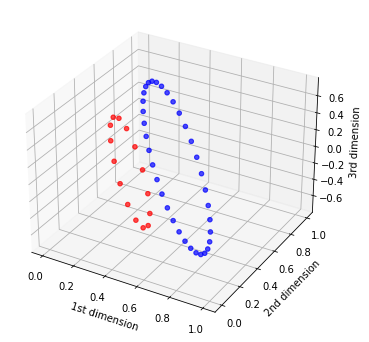

In [7]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mapped_x[y==1, 0], mapped_x[y==1, 1], mapped_x[y==1, 2], color='red', alpha = 0.45)
ax.scatter(mapped_x[y==0, 0], mapped_x[y==0, 1], mapped_x[y==0, 2], color='blue', alpha = 0.45)
#plt.title('inseparable datasets')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_zlabel('3rd dimension')

As can be seen, the additional 3rd dimension makes the problem far easier to solve. Now, a plane can easily separate the two classes.

### just another projection into 3D
<br>
<br>


\begin{equation*}
\Phi(\mathbf{x})\rightarrow \mathbf{x}_i, \mathbf{x}_2, \sum_i^n \exp\left(-\frac{\|\mathbf{x}- \mathbf{x}_i\|^2}{2\sigma^2}\right)
\end{equation*}

<br>

__BUT__ as we will see later, there exists no kernel-trick for this projection. The projection is helpfull to make the two classes separable but other projections allow for more efficient solutions.

In [8]:
# not 100 % correct though
# https://stats.stackexchange.com/questions/63881/use-gaussian-rbf-kernel-for-mapping-of-2d-data-to-3d

from scipy.spatial.distance import pdist, squareform
from scipy import exp
pairwise_d = squareform(pdist(x, 'euclidean'))
projection = exp(-pairwise_d **2 / (2 ** 2))
new_dim = np.sum(projection, axis=1)

/home/martin/miniconda3/envs/imbalanced/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  import sys


Text(0.5, 0, '3rd dimension')

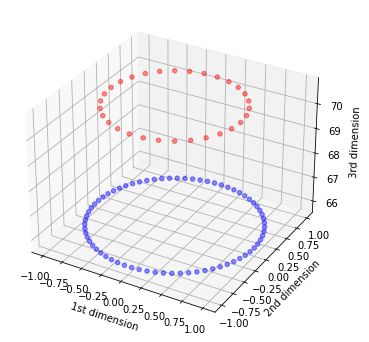

In [9]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y==1, 0], x[y==1, 1], new_dim[y==1], color='red', alpha = 0.45)
ax.scatter(x[y==0, 0], x[y==0, 1], new_dim[y==0], color='blue', alpha = 0.45)
#plt.title('inseparable datasets')
ax.set_xlabel('1st dimension')
ax.set_ylabel('2nd dimension')
ax.set_zlabel('3rd dimension')

### Der kernel-Trick besteht genau darin, dass die Projektion in einen höher-dimensionalen Raum nicht vorgenommen werden muss

Wir erinnern die charakteristische Formel des maximal-margin classifiers:

\begin{equation*}\text{max}_{\alpha}\sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i y_j \mathbf{x}_i^{T} \cdot \mathbf{x}_j\end{equation*}

Anstatt mit den urspr. Daten-Punkten $\mathbf{x}_i$ und $\mathbf{x}_j$ muss diese Gleichung jetzt für die Projektionen der Daten vorgenommen werden:

### unsere erste Projektion:

$\Phi(\mathbf{x})\rightarrow \mathbf{x}_1^{2}, \mathbf{x}_2^{2},\sqrt{2}\mathbf{x}_1\mathbf{x}_2$

einsetzen in das Skalarprodukt (dot-product) für 2 Daten-Punkte $\mathbf{x}_i$ und $\mathbf{x}_j$ (wie in der characteristischen Gleichung oben):
\begin{eqnarray*}
\langle\Phi(\mathbf{x}_i),\Phi(\mathbf{x}_j)\rangle =&\\
\langle[x_{i1}^{2},x_{i2}^{2}, \sqrt{2}x_{i1}x_{i2}],[x_{j1}^{2},x_{j2}^{2}, \sqrt{2}x_{j1}x_{j2}]\rangle =& \\
x_{i1}^{2}x_{j1}^{2} + x_{i2}^{2}x_{j2}^{2} +2 x_{i1}x_{i2}x_{j1}x_{j2}
\end{eqnarray*}

### Trick: Es gibt eine einfachere Rechenvorschrift, die zum selben Ergebnis kommt. Das ist der Kernel-Trick

\begin{eqnarray*}
\langle\Phi(\mathbf{x}_i),\Phi(\mathbf{x}_j)\rangle = \langle\mathbf{x}_i,\mathbf{x}_j\rangle^{2} =&\\
\langle[x_{i1}, x_{i2}],[x_{j1}, x_{j2}]\rangle^{2} =& \\
(x_{i1}x_{j1} + x_{i2}x_{j2})^{2} =& \\
x_{i1}^{2}x_{j1}^{2} + x_{i2}^{2}x_{j2}^{2} + 2 x_{i1}x_{i2}x_{j1}x_{j2}
\end{eqnarray*}

Man kann jetzt also schreiben:<br>
\begin{equation*}
k(\mathbf{x_i}, \mathbf{x_j}) = \langle\mathbf{x}_i,\mathbf{x}_j\rangle^{2}
\end{equation*}

Für unsere charackteristische Gleichung könnten wir nun schreiben:<br>
\begin{equation*}
\text{max}_{\alpha}\sum_i\alpha_i - \frac{1}{2}\sum_{i,j}\alpha_i\alpha_j y_i y_j k(\mathbf{x_i}, \mathbf{x_j})
\end{equation*}

__Unser maximal-margin Classifier könnte also das Problem der 2 Ringe lösen, ohne explizit die Projektione in 3D vornehmen zu müssen__.

Unterschied:<br>
1.Methode:
* Projektion in höher-dimensionalen Raum
* Multiplikation in höher-dimensionalen Raum

2.Method:
* Multiplikation im Ausgangs-Raum
* Quadratur des Ergebnisses

## What are kernels exactly?

Basically, kernels are similarity measures outside the usual Euclidean space.<br>
We can interpret kernels in two different ways:<br>

Either
 * we project the data into higher dimensional spaces and compute Euclidean distances (similarities)<br>
 
Or<br>
 * we use a different distance measure (other then Euclidean distance) in the original space that correponds to Euclidean distance in the projected dimension

For example, take the __radial basis function kernel__:

\begin{equation*}
K(X_1, X_2) = \exp\left(-\frac{\|X_1 - X_2\|^2}{2\sigma^2}\right)
\end{equation*}

$\left\Vert X_1 - X_2\right\Vert$ is the Euclidean distance between the points $X_1$ and $X_2$ or between two vectors $\mathbf{x}_1$ and $\mathbf{x}_2$.<br>
If this distance is $0$, i.e. the two cases are actually identical, then the similarity - as measured by the rbf-kernel - is $1$:

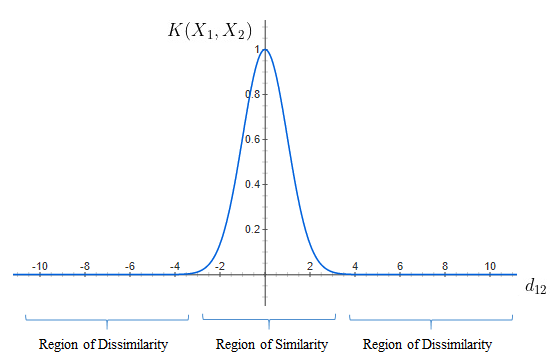

In [10]:
Image('../images/rbf_kernel.png')

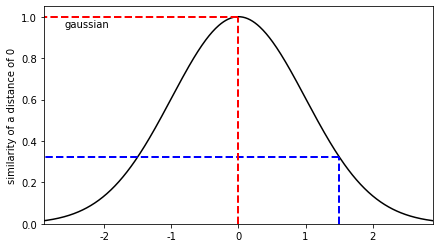

In [11]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return '1'
    elif x == -1:
        return '-1'
    else:
        return '%i' % x
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)
log_dens = KernelDensity(kernel='gaussian').fit(X_src).score_samples(X_plot)
ax.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)), '-k')#, fc='#AAAAFF')
ax.text(-2.6, 0.95, 'gaussian')

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
#ax.yaxis.set_major_locator()

ax.set_ylim(0, 1.05)
ax.set_xlim(-2.9, 2.9)
plt.ylabel('similarity of a distance of 0')
density_at_1_5 = np.exp(KernelDensity(kernel='gaussian').fit(X_src).score_samples(np.array([1.5]).reshape((-1,1))))/np.max(np.exp(log_dens))
ax.plot([1.5] *2, [0, density_at_1_5], 
        'b--', lw=2, label='')
ax.plot([1.5, -3], [density_at_1_5] * 2, 'b--', lw=2, label='')
ax.plot([0] * 2, [0, 1], 'r--', lw=2, label='')
ax.plot([0, -3], [1] * 2, 'r--', lw=2, label='')

## Simple Kernel-Regression
Here, Kernels just define a neighborhood by similarity in kernel-space. For a certain point the values of its neighbors are weighted by similarity and then averaged.<br>
The Euclidean distance on the x-axis is transformed into a similarity-measure on the y-axis.

Text(0, 0.5, 'densities (or similarities)')

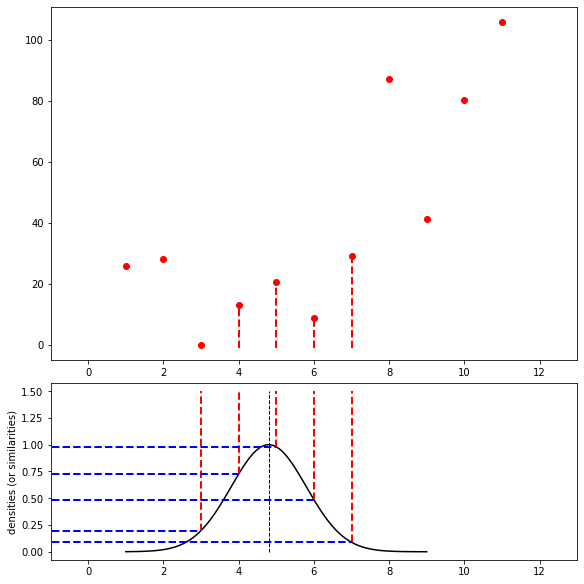

In [12]:
# f = plt.figure(figsize=(5, 5), dpi=100)
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

fig = plt.figure(figsize=(8,8), constrained_layout=True)
plt.title(label='kernel regression', fontdict={'fontsize':20})
gs = fig.add_gridspec(nrows=3, ncols=3, figure=fig)
#fig.subplots_adjust( left=0.05, right=0.95, wspace=0.05)
#ax1 = fig.add_subplot(gs[:-1, :])
plt.subplot(gs[:-1,:])

#ax1.plot(X[:,0], y, 'ro')
plt.plot(X[:,0], y, 'ro')

for i,j in zip(X[2:7], y[2:7]):
    plt.plot([i] * 2, [-1, j], 'r--', lw=2, label='')
#ax1.set_ylim([np.min(y)-5, np.max(y) +5])
plt.ylim([np.min(y)-5, np.max(y) +5])
#plt.get_yaxis().set_visible(True)
plt.xlim([np.min(X)-2, np.max(X) +2])
#axes = plt.gca()

ax2 = fig.add_subplot(gs[-1:, :])
ax2.set_xlim([np.min(X)-2, np.max(X) +2])
X_plot = np.linspace(1, 9, 1000)[:, None]
X_src = np.array([[4.8]])
log_dens = KernelDensity(kernel='gaussian').fit(X_src).score_samples(X_plot)
ax2.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)), '-k')#, fc='#AAAAFF')

densities = np.exp(KernelDensity(kernel='gaussian').fit(X_src).score_samples(X[2:7, ]))
for i, d in zip(X[2:7,], densities):
    ax2.plot([i] * 2, [d/np.max(np.exp(log_dens)), 1.5], 'r--', lw=2, label='')
    ax2.plot([-5, i], [d/np.max(np.exp(log_dens))] * 2, 'b--', lw=2, label='')
    
# make vertikal line at 5.0
ax2.plot([4.8] *2, [0, 1.5], 'k--', lw=1)    
ax2.set_ylabel('densities (or similarities)')    
#plt.tight_layout()




The prediction takes part at the center $x$ of the kernel. The similiarities to this center-point $x$ are evaluated for all points $x_i$ in its vicinity and the values $y_i$ are weighted by the respective similarity. Points closer to the center $x$ receive higher weights and have more influence on the predicted value.<br>
In order to make the prediction independent of the exact weights, we have to divide by the sum of the weights.

\begin{equation}
\hat{m}(x) = \frac{\sum_i^n K_h(x - x_i)y_i}{\sum_i^n K_h(x - x_i)}
\end{equation}

Here, $h$ is the bandwidth or the scale of the kernel. In the context of a gaussian kernel one could also say the __variance__.

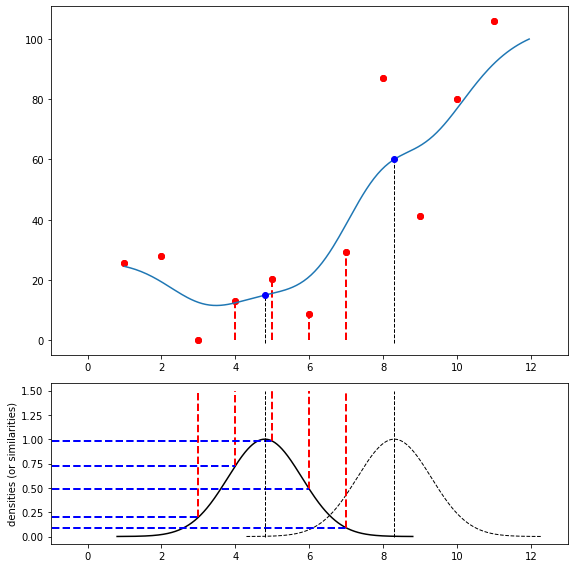

In [13]:
fig = plt.figure(figsize=(8,8), constrained_layout=True)
plt.title(label='kernel regression', fontdict={'fontsize':20})
gs = fig.add_gridspec(nrows=3, ncols=3, figure=fig)
#fig.subplots_adjust( left=0.05, right=0.95, wspace=0.05)
#ax1 = fig.add_subplot(gs[:-1, :])
plt.subplot(gs[:-1,:])

plt.plot(X[:,0], y, 'ro')

for i,j in zip(X[2:7], y[2:7]):
    plt.plot([i] * 2, [0, j], 'r--', lw=2, label='')
plt.ylim([np.min(y)-5, np.max(y) +5])
#ax1.get_yaxis().set_visible(True)
#axes = plt.gca()
x = np.arange(1, 12, 0.05).reshape((-1, 1))
y_kr = []
for x_i in x:
    densities = np.exp(KernelDensity(kernel='gaussian').fit(np.array([[x_i[0]]])).score_samples(X))
    y_kr.append(np.sum(densities.reshape((-1, 1)) * y)/sum(densities))
plt.plot(X[:,0], y, 'ro', x[:,0], np.array(y_kr).reshape((-1,)))    
plt.xlim([np.min(X)-2, np.max(X) +2])

# make vertikal line at 8.3
densities = np.exp(KernelDensity(kernel='gaussian').fit(np.array([[8.3]])).score_samples(X))
pred_kr = np.sum(densities.reshape((-1, 1)) * y)/sum(densities)
plt.plot([8.3] * 2, [-1, pred_kr], 'k--', lw=1)
plt.plot(8.3, pred_kr, 'bo')


# make vertikal line at 4.8
densities = np.exp(KernelDensity(kernel='gaussian').fit(np.array([[4.8]])).score_samples(X))
pred_kr = np.sum(densities.reshape((-1, 1)) * y)/sum(densities)
plt.plot([4.8] * 2, [-1, pred_kr], 'k--', lw=1)
plt.plot(4.8, pred_kr, 'bo')

ax2 = fig.add_subplot(gs[-1:, :])
ax2.set_xlim([np.min(X)-2, np.max(X) +2])


X_plot = np.linspace(4.3, 12.3, 1000)[:, None]
X_src = np.array([[8.3]])
log_dens = KernelDensity(kernel='gaussian').fit(X_src).score_samples(X_plot)
ax2.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)), 'k--', lw=1)#, fc='#AAAAFF')

X_plot = np.linspace(0.8, 8.8, 1000)[:, None]
X_src = np.array([[4.8]])
log_dens = KernelDensity(kernel='gaussian').fit(X_src).score_samples(X_plot)
ax2.plot(X_plot[:, 0], np.exp(log_dens)/np.max(np.exp(log_dens)), '-k')#, fc='#AAAAFF')

densities = np.exp(KernelDensity(kernel='gaussian').fit(X_src).score_samples(X[2:7, ]))
for i, d in zip(X[2:7,], densities):
    ax2.plot([i] * 2, [d/np.max(np.exp(log_dens)), 1.5], 'r--', lw=2, label='')
    ax2.plot([-5, i], [d/np.max(np.exp(log_dens))] * 2, 'b--', lw=2, label='')

    
# make vertikal line at 5.0
ax2.plot([4.8] *2, [0, 1.5], 'k--', lw=1)
# make vertikal line at 8.0
ax2.plot([8.3] *2, [0, 1.5], 'k--', lw=1)

ax2.set_ylabel('densities (or similarities)') 
plt.tight_layout()


(-5.0, 110.77315979942053)

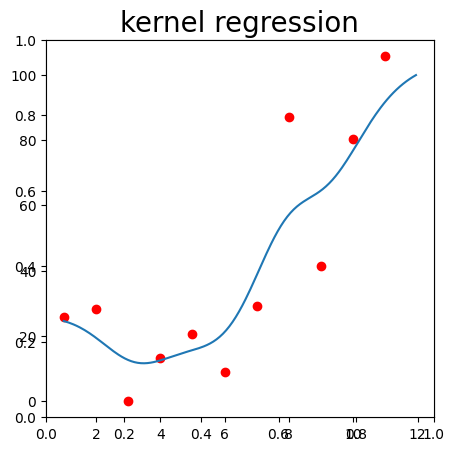

In [14]:
x = np.arange(1, 12, 0.05).reshape((-1, 1))
y_kr = []
for x_i in x:
    densities = np.exp(KernelDensity(kernel='gaussian').fit(np.array([[x_i[0]]])).score_samples(X))
    y_kr.append(np.sum(densities.reshape((-1, 1)) * y)/sum(densities))
    
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='kernel regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
axes.plot(X[:,0], y, 'ro', x[:,0], np.array(y_kr).reshape((-1,)))
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])    

Variants of this technique are also known as '__kernel smoothing__'.

## How is the similarity-measure related to the support-vector-machine?

Remember that in the characteristic equation we had:

$$\mathbf{x}_i^{T} \cdot \mathbf{x}_j$$

This is the dot-product between two vectors. The dot-product for standardized vectors happens to coincide with the cosine-similarity that is identical to the correlation-coefficient $r$ (both are measures for similarity or nearness).<br>
With the kernel trick, we can now apply many different similarity-measures that hopefully help to distinguish our classes better than euclidean distance can do.<br>
Or, put in another way: we can either project our data into higher spaces and compute our conventional similarity measures in those spaces __or__: we use other similarity-measures that approximate the former approach.

In [15]:
## One-Class SVM
## Finde die kleinst mögliche Kugel (hyper sphere), die alle Datenpunkte umschliesst.
## Angewendet auf neue Datenpunkte:
##     - finde die Distanz zum Mittelpunkt: ist diese Grösser als der Radius der hyper sphere, dann ist der Datenpunkt nicht in der Klasse
##     - finde die Distanz zur Begrenuzungsebene: pos Distanz -> in-class; neg Distanz -> out-class

## Support-Vector-Regression

For Support-Vector-Regression (SVR) we are looking for bounds around a Regression-Line that comprise as many of our data samples as possible:<br>
\begin{equation*} 
-c \leq y - a + b \cdot x \leq c 
\end{equation*}<br>
Of course, we try to make theses bounds as tight as possible.<br>
This problem is solved in a similar manner as our Support-Vector-Classification. The problem here, it also scales quadratically or even worse.


Text(6, 2, '-c')

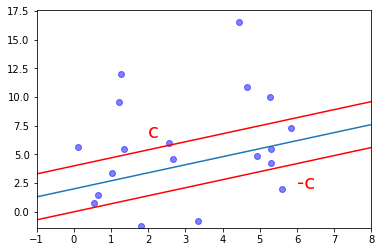

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# real line
# y = a + bx

x = np.arange(-3, 10, 0.05).reshape((-1, 1))

X = np.random.uniform(0, 6, 20)
b = 0.7
a = 2
Y = a + b*X + np.random.normal(0, 6, size = X.shape[0])

fig = plt.figure() 
ax = plt.axes()
plt.xlim(-1, 8)
plt.ylim(np.min(Y) + 1, np.max(Y) + 1)
# plt.gca().set_aspect('equal', adjustable='box')

ax.plot(x, a + b*x)
ax.plot(x, a + b* x + 2, color='red')
ax.plot(x, a + b* x - 2, color='red')
# ax.plot(x, (b-4) + w1 * x, color='red')
# ax.plot(x, (b+4) + w1 * x, color='red')
ax.scatter(X, Y, color='blue', alpha=0.5)
# ax.scatter(cl2[:, 0], cl2[:, 1], color='red', alpha=0.5)
#ax.scatter(cl1_s[:, 0], cl1_s[:, 1], color='black', alpha=0.7)
# ax.scatter(cl2_s[:, 0], cl2_s[:, 1], color='blue', alpha=0.6)
#ax.scatter(7, b + w[0] * 7, color='black')
# ax.scatter(41/13, b + w1 *(41/13), color = 'black')
#ax.plot([41/13, cl1_s[0,0]],[b + w1 * (41/13), cl1_s[0,1]], color='black')
plt.annotate(text='c',xy=(2, 6.5), color = 'red', size=20)
plt.annotate(text='-c',xy=(6, 2), color = 'red', size=20)

# plt.arrow(-2.5, -2.5, w[0] * -2, w[1] * -2, head_width=0.5)
#plt.annotate(text='w', xy=(-1,-0.5))
# plt.scatter(x, y, color='red', alpha = 0.45)
# print(f'{b + w1 * x + w2 * y}')